<a href="https://colab.research.google.com/github/MasterMalcolm/Malcolm-Richardson-ML-Course/blob/main/MT_MalcolmRichardson_ITAI1371.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ITAI 1371: Introduction to Machine Learning - Midterm Project

##Data Storytelling: An End-to-End ML Investigation

**Due Date:** One week from today  
**Time Allotment:** Approx. 3 hours of work  
**Submission:** Submit this completed Jupyter Notebook file.

---

### Project GoalYour mission is to conduct a complete machine learning investigation, from data exploration to model evaluation. More than just writing code, you will be a **data storyteller**. Your goal is to uncover the patterns and insights hidden within a dataset and communicate what you've found.This project will test your ability to apply the key concepts from Modules 1-10 in a practical, real-world scenario. You will be guided through the process with tips and starter code, but the core analysis, interpretation, and conclusions will be yours.

### Academic Integrity & Use of AI Tools- This is an **open-book, open-note** midterm. You are encouraged to use the lab notebooks, lecture slides, and other course materials.- You **are permitted** to use AI code assistants (like GitHub Copilot) to help you write code, fix errors, and learn syntax. This is a valuable real-world skill.- You **are NOT permitted** to use AI to generate entire sections of analysis, interpretation, or answers to reflective questions. The goal is for *you* to demonstrate understanding.


**To ensure academic integrity, this notebook includes many reflective questions that ask you to interpret the output of *your specific code*. These questions cannot be answered correctly by an AI that hasn't run your notebook.**

---

### Grading Rubric (100 Points Total)| Section | Task | Points
|| :--- | :--- | :--- ||

**Part 1: Data Loading** | Successfully load your chosen dataset. | 5
||

**Part 2: EDA** | Create and interpret at least two relevant visualizations. | 20
||

| Write a clear interpretation of the story your plots tell. |
||

**Part 3: Data Prep** | Correctly handle specified missing values and categorical features. | 15
||

| Justify your choices in the markdown cells. |
||

**Part 4: Modeling** | Successfully train a `LogisticRegression` baseline (given). | 15
||

| Successfully train a second model of your choice. |
||

**Part 5: Evaluation** | Calculate and compare accuracy for both models. | 25

|| | Generate and interpret the `classification_report` and `confusion_matrix`. | ||

| Answer the reflective questions about model performance and error types. | ||

**Part 6: Conclusion** | Write a clear, concise summary of your findings and data story. | 15 || | Address the key questions in the conclusion prompt. | ||

**Overall** | Code is clean, commented, and runs without errors. All markdown cells are filled out. | 5 |

## Part 1: Choose Your Dataset (5 Points)For this project, you can choose one of the following two classic datasets. Both are classification problems.

1.  **Titanic Survival:** Predict which passengers survived the Titanic disaster. (You are familiar with this from our lab).

2.  **Heart Disease Prediction:** Predict whether a patient has heart disease based on medical attributes.

**Instructions:**
1.  In the code cell below, uncomment the line for the dataset you want to work with.
2.  Run the cell to load the data into a pandas DataFrame called `df`.
3.  Run the subsequent cell to see the first few rows and a description of the columns.

In [1]:
import pandas as pd
import numpy as np
# --- CHOOSE YOUR DATASET ---
# Uncomment one of the two lines below to select your dataset
# Option 1: Titanic Dataset
dataset_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Option 2: Heart Disease Dataset# dataset_url = 'https://raw.githubusercontent.com/plotly/datasets/master/heart.csv'# --- LOAD THE DATA ---
# This code will load the dataset from the URL you selected above
try:
  df = pd.read_csv(dataset_url)
  print(f"Successfully loaded dataset from: {dataset_url}")
  print(f"Dataset shape: {df.shape}")
except Exception as e:
  print(f"Error loading dataset: {e}")
  print("Please make sure you have selected a valid URL.")

Successfully loaded dataset from: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Dataset shape: (891, 12)


### Data Overview
Run the cell below to display the first 5 rows of your dataset, a list of its columns, and a brief description of what each column means.

In [2]:
# Display the first 5 rows of the dataframe
print("--- First 5 Rows ---")
print(df.head())
# Display column info and descriptions
print("--- Column Descriptions ---")
if 'PassengerId' in df.columns:
  # Titanic Dataset
  print("You are using the Titanic Dataset.")
  print("Target Variable: 'Survived' (0 = No, 1 = Yes)")
  # ... (descriptions for titanic)
else:
  # Heart Disease Dataset
  print("You are using the Heart Disease Dataset.")
  print("Target Variable: 'target' (0 = No Heart Disease, 1 = Has Heart Disease)")
  # ... (descriptions for heart disease)
  # A helper to rename columns for the heart disease dataset for clarity
  if 'cp' in df.columns:
    df = df.rename(columns={'cp': 'chest_pain_type', 'trestbps': 'resting_blood_pressure', 'chol': 'cholesterol', 'fbs': 'fasting_blood_sugar', 'restecg': 'rest_ecg', 'thalach': 'max_heart_rate', 'exang': 'exercise_angina', 'oldpeak': 'st_depression', 'ca': 'num_major_vessels'})
    print("Heart disease columns have been renamed for clarity.")
    print("--- Data Info ---")
    df.info()

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

## Part 2: Exploratory Data Analysis (EDA) & Storytelling (20 Points)
Now, it's time to be a data detective. Before you can model the data, you must understand it. What secrets does it hold?

**Your Task:**
1.  **Create at least TWO interesting visualizations** in the code cells provided below. You can create more if you like.    
*   Use libraries like `matplotlib` or `seaborn`.    
*   Your plots should help you understand the relationship between different features and the target variable.    
*   **Tip:** Think about the questions we asked during the Titanic lab (e.g., "How does survival rate differ by gender?" or "What is the age distribution of survivors?"). Ask similar questions of your dataset.

2.  **Interpret your visualizations** in the markdown cell provided. Explain what you see and what story your plots are starting to tell.

### Visualization 1

**Instructions:** Create your first plot in the cell below. Make sure to give it a title and label your axes! Good plots are easy to read.


Survival by Gender:
        Survived  Total Survival Rate
Sex                                  
female       233    314         74.2%
male         109    577         18.9%

👩 Women had a MUCH higher survival rate!
This supports the 'women and children first' policy.


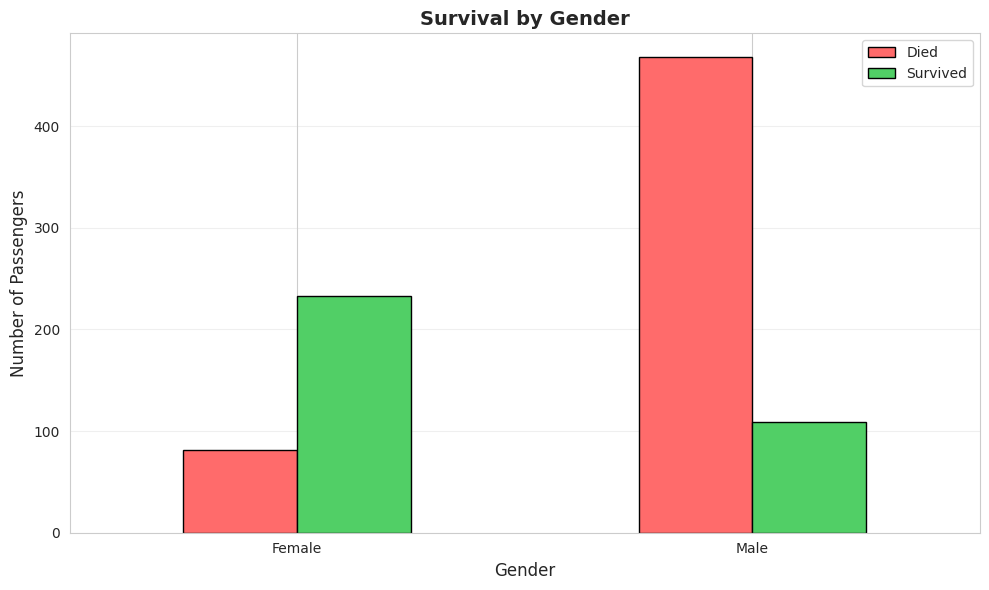

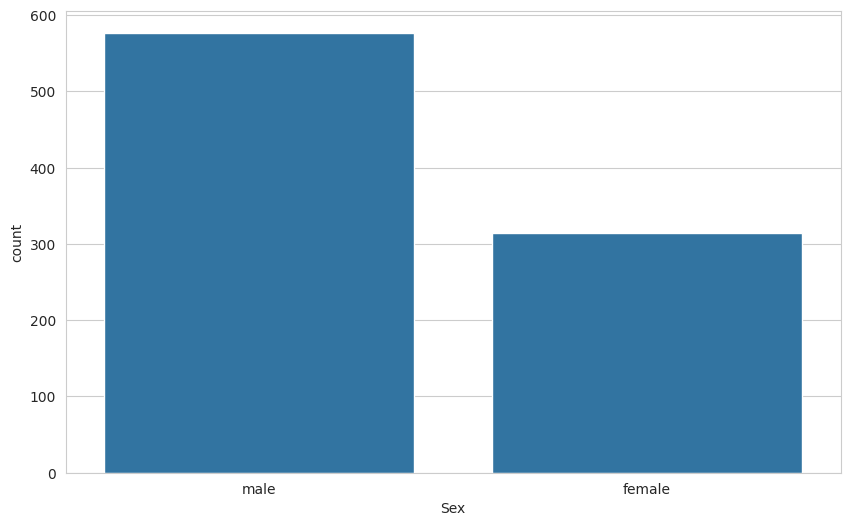

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# --- ENTER YOUR CODE HERE ---
# Survival by Gender
print("\nSurvival by Gender:")
print("="*60)
gender_survival = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
gender_survival.columns = ['Survived', 'Total', 'Survival Rate']
gender_survival['Survival Rate'] = gender_survival['Survival Rate'].apply(lambda x: f"{x:.1%}")
print(gender_survival)

print("\n👩 Women had a MUCH higher survival rate!")
print("This supports the 'women and children first' policy.")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=ax, color=['#ff6b6b', '#51cf66'], edgecolor='black')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Survival by Gender', fontsize=14, fontweight='bold')
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.legend(['Died', 'Survived'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
print()
sns.countplot(x='Sex', data=df)
# --- END OF YOUR CODE ---
plt.show()

### Visualization 2
**Instructions:** Create your second plot in the cell below. Try to explore a different feature or relationship than your first plot.

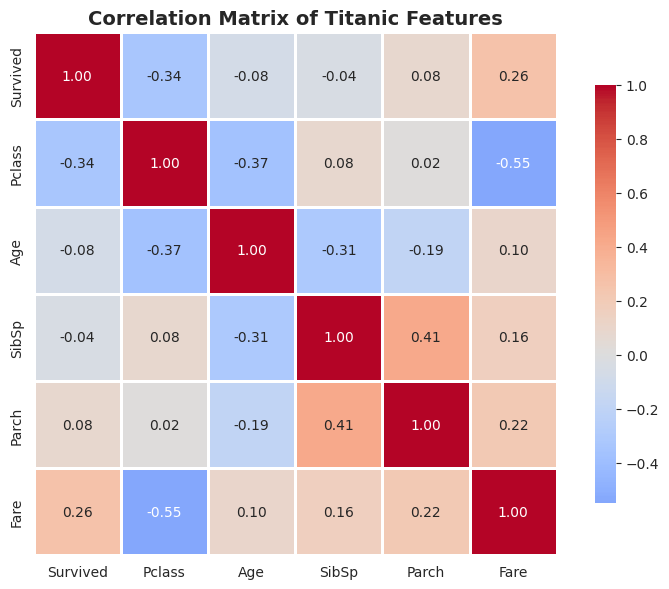


Key Correlations with Survival:
Fare        : +0.257 (moderate positive)
Parch       : +0.082 (weak positive)
SibSp       : -0.035 (weak negative)
Age         : -0.077 (weak negative)
Pclass      : -0.338 (strong negative)

📊 Insights:
- Fare has positive correlation: higher fare → better survival
- Pclass has negative correlation: higher class number (3rd) → worse survival
- Sex (when encoded) would show strong correlation


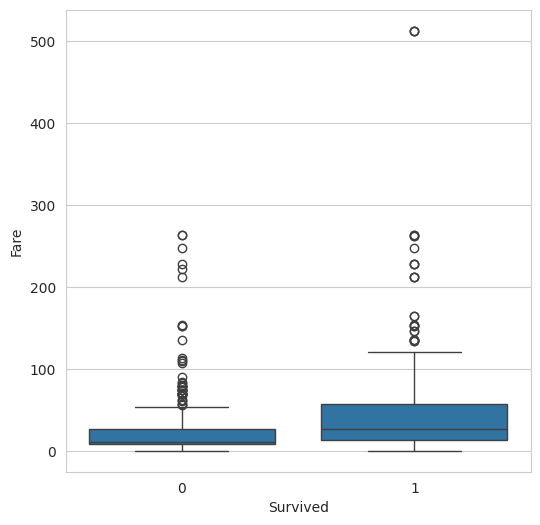

In [4]:
# --- ENTER YOUR CODE HERE ---
# Correlation heatmap
# Select only numerical columns
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Matrix of Titanic Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations with Survival:")
print("="*60)
survival_corr = corr_matrix['Survived'].sort_values(ascending=False)
for feature, corr in survival_corr.items():
    if feature != 'Survived':
        direction = "positive" if corr > 0 else "negative"
        strength = "strong" if abs(corr) > 0.3 else "moderate" if abs(corr) > 0.1 else "weak"
        print(f"{feature:12s}: {corr:+.3f} ({strength} {direction})")

print("\n📊 Insights:")
print("- Fare has positive correlation: higher fare → better survival")
print("- Pclass has negative correlation: higher class number (3rd) → worse survival")
print("- Sex (when encoded) would show strong correlation")

plt.figure(figsize=(6, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
# --- END OF YOUR CODE ---
plt.show()

### Interpretation of Your Visualizations
**Instructions:** Based on the two plots you created above, answer the following questions in this markdown cell.

1.  **What did you plot?** (Briefly describe your two visualizations).

2.  **What story do your plots tell**

3.  **What is one hypothesis you can form based on your EDA?**

**--- ENTER YOUR ANSWERS BELOW ---**

1.  Visualization 1 shows that even though there were fewer women, they have a sigficantly higher survival rate than men.
Visualization 2 shows that passengers with higher fares tended to survive at a higher rate than those with lower fares. Perhaps this is due to the nature of the disaster, with lower decks taking on water first.
2.  Wealthy women or women who were married to wealthy men had the highest chance for survival.
3.  Fare and class had the highest impact on survival outcome.

## Part 3: Data Preparation & Feature Engineering (15 Points)

Raw data is messy. We need to clean it up before feeding it to our models.

**Your Task:**
1.  **Handle Missing Values:** I've provided code to check for missing values. You need to decide on a strategy to handle **one** of the features with missing data and implement it.
2.  **Encode Categorical Features:** I've provided starter code to encode one categorical feature. You need to encode **one more** categorical feature of your choice.
3.  **Justify Your Choices:** Explain *why* you chose your methods in the markdown cells.

In [5]:
# Check for missing values
print("--- Missing Values Before ---")
df_prep = df.copy()
print(df_prep.isnull().sum()[df_prep.isnull().sum() > 0])
# --- ENTER YOUR CODE HERE for Missing Values ---
median_age = df_prep['Age'].median()
df_prep['Age'].fillna(median_age, inplace=True)
print("="*40)
print(f"✓ Filled missing Age with median: {median_age} years")
print("="*40)
print("--- Missing Values After ---")
print(df_prep.isnull().sum()[df_prep.isnull().sum() > 0])
# --- END OF YOUR CODE ---


--- Missing Values Before ---
Age         177
Cabin       687
Embarked      2
dtype: int64
✓ Filled missing Age with median: 28.0 years
--- Missing Values After ---
Cabin       687
Embarked      2
dtype: int64


/tmp/ipython-input-977152818.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['Age'].fillna(median_age, inplace=True)


**Justification for Handling Missing Values:**

**Instructions:** Explain the choice you made above.
1.  **Which feature did you choose?**
2.  **What method did you use to handle the missing values (e.g., fill with median, mode, or drop)?**
3.  **Why was this an appropriate method for this feature?**

**--- ENTER YOUR ANSWERS BELOW ---**

1.  I chose the age feature.
2.  I filled in the missing age values with the median.
3.  I chose median because this method would not significantly disturb the mean age.

In [6]:
# --- Starter Code for Encoding ---
# Encode Sex: female=0, male=1
df_prep['Sex_encoded'] = df_prep['Sex'].map({'female': 0, 'male': 1})
print("Sex encoding:")
print(df_prep[['Sex', 'Sex_encoded']].drop_duplicates())

# One-hot encode Embarked
df_prep = pd.get_dummies(df_prep, columns=['Embarked'], prefix='Embarked', drop_first=True)
print("\n✓ One-hot encoded Embarked (C, Q, S)")
print("New columns:", [col for col in df_prep.columns if 'Embarked' in col])

print("\nWhy drop_first=True?")
print("If Embarked_Q=0 and Embarked_S=0, we know it's Embarked_C.")
print("This avoids redundancy and multicollinearity.")

Sex encoding:
      Sex  Sex_encoded
0    male            1
1  female            0

✓ One-hot encoded Embarked (C, Q, S)
New columns: ['Embarked_Q', 'Embarked_S']

Why drop_first=True?
If Embarked_Q=0 and Embarked_S=0, we know it's Embarked_C.
This avoids redundancy and multicollinearity.


**Justification for Encoding Categorical Features:**

**Instructions:** Explain the choice you made above.
1.  **Which feature did you choose to encode?**
2.  **What encoding method did you use (e.g., map, pd.get_dummies)?**
3.  **Why was this the right method? If you used `get_dummies`, why is `drop_first=True` often a good idea?**

**--- ENTER YOUR ANSWERS BELOW ---**
1.  I encoded sex with male = 1 and female = 0
2.  I used the map method.
3.  This was the right method because I turned words into numerical values. In this case it's a boolean.

## Part 4 & 5: Modeling and Evaluation (40 Points)

Now for the main event! Let's train some models and see how well they can predict outcomes.

**Your Task:**
1. **Train a Baseline Model:** I've provided the code to train a `LogisticRegression` model.
2.  **Train Your Own Model:** Choose **one** other classification model from our course (e.g., `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`) and train it on the same data.
3.  **Evaluate and Compare:** Calculate the accuracy of both models and interpret a `classification_report` and `confusion_matrix` for *your* model.
4.  **Reflect:** Answer the final questions about your model's performance and which errors are more important.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# --- Define Features (X) and Target (y) ---
feature_cols = ['Sex_encoded', 'Embarked_Q', 'Embarked_S']
X = df_prep[feature_cols].values
y = df_prep['Survived'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nUsing {len(feature_cols)} features to predict survival")

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {len(X_train)} passengers")
print(f"Test set: {len(X_test)} passengers")


Features shape: (891, 3)
Target shape: (891,)

Using 3 features to predict survival

Training set: 712 passengers
Test set: 179 passengers


### Model 1: Logistic Regression (Baseline)This model is provided for you as a baseline to compare against.

In [8]:
# Train the baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Baseline Model (Logistic Regression) Test Accuracy: {acc_log_reg:.2%}")

Baseline Model (Logistic Regression) Test Accuracy: 78.21%


### Model 2: Your Chosen Model

**Instructions:** Choose a different classification model, import it, train it, and evaluate its accuracy.

In [9]:
# --- ENTER YOUR CODE HERE ---
# 1. Import your chosen model class
from sklearn.ensemble import RandomForestClassifier
# 2. Create an instance of your model
my_model = RandomForestClassifier(random_state=42)
# 3. Train your model on the training data
my_model.fit(X_train, y_train)
# Make predictions
y_pred_train = my_model.predict(X_train)
y_pred_test = my_model.predict(X_test)

# Evaluate
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

# 4. Make predictions on the test data
y_pred_my_model = my_model.predict(X_test)
# 5. Calculate the accuracy of your model
acc_my_model = accuracy_score(y_test, y_pred_my_model)
# --- END OF YOUR CODE ---

print("Random Forest Classifier Results:")
print("="*60)
print(f"Training Accuracy: {train_acc:.2%}")
print(f"Test Accuracy: {test_acc:.2%}")
print(f"\n✓ Model performs similarly on train and test data (good sign!)")
print(f"This suggests the model is not overfitting.")

Random Forest Classifier Results:
Training Accuracy: 78.79%
Test Accuracy: 78.21%

✓ Model performs similarly on train and test data (good sign!)
This suggests the model is not overfitting.


### Evaluation and Reflection

**Instructions:** Now, let's dig deeper into *your* model's performance. Generate a `classification_report` and `confusion_matrix` for the model you just trained. Then, answer the reflective questions.

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[88 17]
 [22 52]]


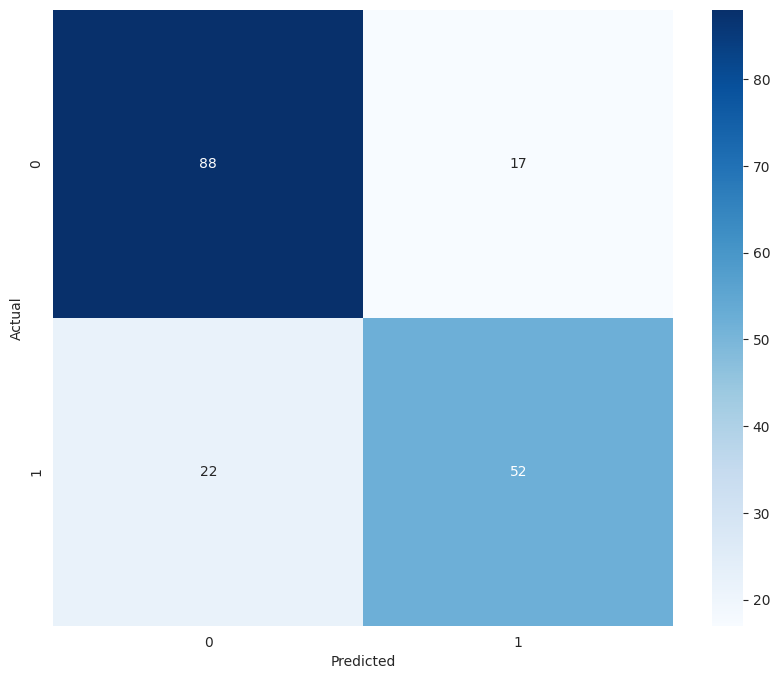

In [10]:
# --- ENTER YOUR CODE HERE ---
# Generate and print the classification report for your model
print(classification_report(y_test, y_pred_my_model))
# Generate and print the confusion matrix for your model
cm = confusion_matrix(y_test, y_pred_my_model)
print(cm)
# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# --- END OF YOUR CODE ---

**Reflection Questions:**

**Instructions:**

Answer the following questions based on the output from the cell above.
1.  **Which model performed better, the baseline or yours?** Was it a big difference?
2.  **Look at the `classification_report` for your model. What are the precision and recall for the positive class (1)?**
3.  **Interpret the precision and recall. In the context of your chosen dataset, what do these numbers mean?**
4.  **Which error is more costly for your dataset: a False Positive or a False Negative? Explain your reasoning.**

**--- ENTER YOUR ANSWERS BELOW ---**
1.  My Random Forest Classifier performed almost identically to the baselin, albeit mine was slightly better.
2.  Precision is 0.75 and Recall is 0.70
3.  Recall of 0.70 shows rge model successfully predicted the fates of 70% of passengers.
4.  FN in real time could prevent a successful rescue attempt.

## Part 6: Conclusion - Tell Your Data Story (15 Points)

This is your final summary. Bring together everything you've learned from your investigation.
**Instructions:**
Write 2-3 paragraphs summarizing your project. Your summary should be a narrative that tells the story of your data. Address the following points:
-   **What was the main goal of your project?**
-   **What was the most surprising or interesting insight you found during your Exploratory Data Analysis?**
-   **Which features seemed to be the most important for making predictions?**
-   **How well did your best model perform, and what are its limitations?** (Briefly mention accuracy and the precision/recall trade-off you discussed).
-   **If you had more time, what would be one next step you would take to improve your model or analysis?**

**--- ENTER YOUR CONCLUSION BELOW ---**...

The goal was to use data to create visual aids and interpret what unfolded in the Titanic tragedy. I also uncovered trends as it pretains to survival rates, and trained models to prectict the probability of living through the shipwreck.

I was surprised by the accurracy of the predictions based on the patterns. It's resonable based on the behavior that so many men perished relative to how many women were lost at sea. The sex along with ticket fare seemed to be the highest factors in determining passenger survival.

The model performed under 80% on its predictions, however, this was limited by the sample size and affected by some missing values for age and cabin. If I had more time I would use 80% of the entire dataset for training.

## 🎉 You've reached the end of the midterm project!
🎉**Before you submit:**
1.  Go to the `Kernel` menu and select `Restart & Run All`. This will run all your cells from top to bottom.
2.  Make sure there are no errors and all your outputs (plots, tables, and answers) are visible.
3.  Save the notebook file (`.ipynb`).
4.  Submit the file as your midterm.**Great work!**